In [70]:
import openmeteo_requests
import requests_cache
import pandas as pd
from retry_requests import retry
import seaborn as sns
import matplotlib.pyplot as plt


Carga de los datos

In [71]:
# Setup the Open-Meteo API client with cache and retry on error
cache_session = requests_cache.CachedSession('.cache', expire_after = 3600)
retry_session = retry(cache_session, retries = 5, backoff_factor = 0.2)
openmeteo = openmeteo_requests.Client(session = retry_session)

# Make sure all required weather variables are listed here
# The order of variables in hourly or daily is important to assign them correctly below
url = "https://api.open-meteo.com/v1/forecast"
params = {
	"latitude": 40.7143,
	"longitude": -74.006,
	"hourly": ["temperature_2m", "precipitation", "snowfall", "snow_depth", "pressure_msl", "cloud_cover", "visibility", "evapotranspiration", "wind_speed_10m", "wind_gusts_10m"],
	"start_date": "2022-10-01",
	"end_date": "2023-11-30"
}
responses = openmeteo.weather_api(url, params=params)

# Process first location. Add a for-loop for multiple locations or weather models
response = responses[0]
print(f"Coordinates {response.Latitude()}°E {response.Longitude()}°N")
print(f"Elevation {response.Elevation()} m asl")
print(f"Timezone {response.Timezone()} {response.TimezoneAbbreviation()}")
print(f"Timezone difference to GMT+0 {response.UtcOffsetSeconds()} s")

# Process hourly data. The order of variables needs to be the same as requested.
hourly = response.Hourly()
hourly_temperature_2m = hourly.Variables(0).ValuesAsNumpy()
hourly_precipitation = hourly.Variables(1).ValuesAsNumpy()
hourly_snowfall = hourly.Variables(2).ValuesAsNumpy()
hourly_snow_depth = hourly.Variables(3).ValuesAsNumpy()
hourly_pressure_msl = hourly.Variables(4).ValuesAsNumpy()
hourly_cloud_cover = hourly.Variables(5).ValuesAsNumpy()
hourly_visibility = hourly.Variables(6).ValuesAsNumpy()
hourly_evapotranspiration = hourly.Variables(7).ValuesAsNumpy()
hourly_wind_speed_10m = hourly.Variables(8).ValuesAsNumpy()
hourly_wind_gusts_10m = hourly.Variables(9).ValuesAsNumpy()

hourly_data = {"date": pd.date_range(
	start = pd.to_datetime(hourly.Time(), unit = "s"),
	end = pd.to_datetime(hourly.TimeEnd(), unit = "s"),
	freq = pd.Timedelta(seconds = hourly.Interval()),
	inclusive = "left"
)}
hourly_data["temperature_2m"] = hourly_temperature_2m
hourly_data["precipitation"] = hourly_precipitation
hourly_data["snowfall"] = hourly_snowfall
hourly_data["snow_depth"] = hourly_snow_depth
hourly_data["pressure_msl"] = hourly_pressure_msl
hourly_data["cloud_cover"] = hourly_cloud_cover
hourly_data["visibility"] = hourly_visibility
hourly_data["evapotranspiration"] = hourly_evapotranspiration
hourly_data["wind_speed_10m"] = hourly_wind_speed_10m
hourly_data["wind_gusts_10m"] = hourly_wind_gusts_10m

Coordinates 40.71033477783203°E -73.99307250976562°N
Elevation 51.0 m asl
Timezone None None
Timezone difference to GMT+0 0 s


In [72]:
hourly_dataframe = pd.DataFrame(data = hourly_data)
hourly_dataframe

,date,temperature_2m,precipitation,snowfall,snow_depth,pressure_msl,cloud_cover,visibility,evapotranspiration,wind_speed_10m,wind_gusts_10m
0,2022-10-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
1,2022-10-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
2,2022-10-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
3,2022-10-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
4,2022-10-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
10219,2023-11-30 19:00:00,10.657499,0.0,0.0,NaN,1019.099976,0.0,53700.0,0.0,13.722565,24.480000
10220,2023-11-30 20:00:00,10.757500,0.0,0.0,NaN,1019.099976,0.0,49900.0,0.0,16.862455,28.440001
10221,2023-11-30 21:00:00,9.907499,0.0,0.0,NaN,1019.299988,19.0,49800.0,0.0,13.896187,28.799999
10222,2023-11-30 22:00:00,8.407499,0.0,0.0,NaN,1019.500000,9.0,43400.0,0.0,9.957108,25.559999


In [73]:
hourly_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10224 entries, 0 to 10223
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                10224 non-null  datetime64[ns]
 1   temperature_2m      5570 non-null   float32       
 2   precipitation       5570 non-null   float32       
 3   snowfall            5570 non-null   float32       
 4   snow_depth          0 non-null      float32       
 5   pressure_msl        5570 non-null   float32       
 6   cloud_cover         5570 non-null   float32       
 7   visibility          5510 non-null   float32       
 8   evapotranspiration  10224 non-null  float32       
 9   wind_speed_10m      5570 non-null   float32       
 10  wind_gusts_10m      5570 non-null   float32       
dtypes: datetime64[ns](1), float32(10)
memory usage: 479.4 KB


 Descripción de las columnas del dataset

In [74]:
hourly_dataframe.columns

Index(['date', 'temperature_2m', 'precipitation', 'snowfall', 'snow_depth',
       'pressure_msl', 'cloud_cover', 'visibility', 'evapotranspiration',
       'wind_speed_10m', 'wind_gusts_10m'],
      dtype='object')

Las variables con las que se va a trabajar son:

Temperature (2 m): La temperatura ambiente puede afectar la demanda de taxis, ya que las personas pueden preferir viajar en taxi en condiciones climáticas extremas.

Precipitation (rain + showers + snow): La presencia de precipitación, ya sea en forma de lluvia o nieve, puede influir en la demanda de taxis y en las condiciones del tráfico.

Wind Speed (10 m): El viento puede afectar la comodidad de viajar en taxi y también puede influir en las condiciones de tráfico.

Cloud cover Total: La cobertura de nubes puede afectar la visibilidad y la percepción del clima, lo que podría tener un impacto en la elección de transporte.

Relative Humidity (2 m): La humedad relativa puede influir en la percepción del clima y afectar la comodidad de los pasajeros.

Visibility: La visibilidad es crucial para la seguridad en la carretera y puede afectar la velocidad del tráfico.

Sealevel Pressure: La presión atmosférica puede estar relacionada con cambios en el clima y puede influir en la demanda de taxis.

Snow Depth: En invierno, la profundidad de la nieve puede afectar las condiciones de la carretera y, por lo tanto, la disponibilidad y eficiencia del servicio de taxis.

Evapotranspiration: La evapotranspiración puede estar relacionada con las condiciones de humedad y sequedad del suelo, lo que podría afectar el tráfico y la demanda de taxis.

Wind Gusts (10 m): Las ráfagas de viento pueden tener un impacto significativo en las condiciones de conducción y, por lo tanto, en la demanda de taxis.

Valores nulos y duplicados

In [75]:
#Cantidad de valores duplicados por variable
print( 'Cantidad de valores duplicados:', (
    hourly_dataframe
    .duplicated()
    .sum()
))

Cantidad de valores duplicados: 0


In [76]:
# Cantidad de valores nulos por variable
print( 'Cantidad de valores duplicados:', (
    hourly_dataframe
    .isnull()
    .sum()
))

Cantidad de valores duplicados: date                      0
temperature_2m         4654
precipitation          4654
snowfall               4654
snow_depth            10224
pressure_msl           4654
cloud_cover            4654
visibility             4714
evapotranspiration        0
wind_speed_10m         4654
wind_gusts_10m         4654
dtype: int64


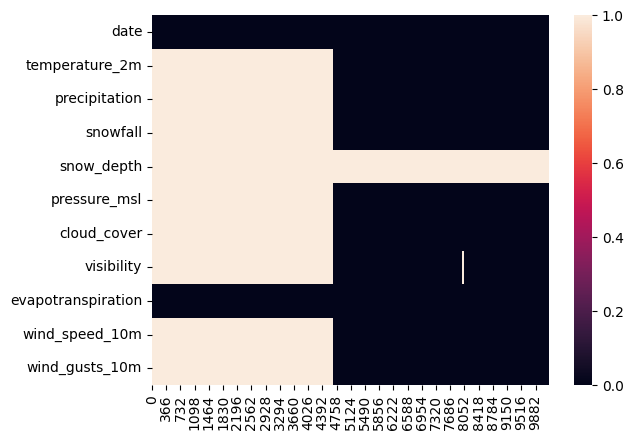

In [77]:
# visualización los valores nulos en todo el conjunto de datos
(
    hourly_dataframe
    .isnull()
    .transpose()
    .pipe(
        lambda df:(
            sns.heatmap(
                data = df
            )
        )
    )
)
plt.show()

Podemos notar que la columna snow_depth no posee datos por lo que la eliminaremos

In [78]:
hourly_dataframe.drop(columns=['snow_depth'], inplace=True)

In [79]:
# Encuentra el índice de la primera fila sin NaN
primer_indice_con_datos = hourly_dataframe['temperature_2m'].first_valid_index()

print("La primera fila con datos comienza en el índice:", primer_indice_con_datos)


La primera fila con datos comienza en el índice: 4654


Tenemos datos disponibles de la mayoría de las variables a partir de la fila 4654. Por lo que quitaremos del dataset a las filas anteriores a la 4654

In [80]:
hourly_dataframe=  hourly_dataframe.iloc[4654:]
hourly_dataframe = hourly_dataframe.reset_index(drop=True)

hourly_dataframe


,date,temperature_2m,precipitation,snowfall,pressure_msl,cloud_cover,visibility,evapotranspiration,wind_speed_10m,wind_gusts_10m
0,2023-04-12 22:00:00,27.196501,0.0,0.0,1008.299988,31.0,NaN,0.0,14.471821,33.839996
1,2023-04-12 23:00:00,25.846500,0.0,0.0,1008.599976,25.0,NaN,0.0,9.114471,28.799999
2,2023-04-13 00:00:00,24.396500,0.0,0.0,1008.599976,36.0,NaN,0.0,6.952754,17.280001
3,2023-04-13 01:00:00,22.946501,0.0,0.0,1009.700012,14.0,NaN,0.0,5.692100,12.240000
4,2023-04-13 02:00:00,21.796499,0.0,0.0,1009.900024,0.0,NaN,0.0,5.351785,10.799999
...,...,...,...,...,...,...,...,...,...,...
5565,2023-11-30 19:00:00,10.657499,0.0,0.0,1019.099976,0.0,53700.0,0.0,13.722565,24.480000
5566,2023-11-30 20:00:00,10.757500,0.0,0.0,1019.099976,0.0,49900.0,0.0,16.862455,28.440001
5567,2023-11-30 21:00:00,9.907499,0.0,0.0,1019.299988,19.0,49800.0,0.0,13.896187,28.799999
5568,2023-11-30 22:00:00,8.407499,0.0,0.0,1019.500000,9.0,43400.0,0.0,9.957108,25.559999


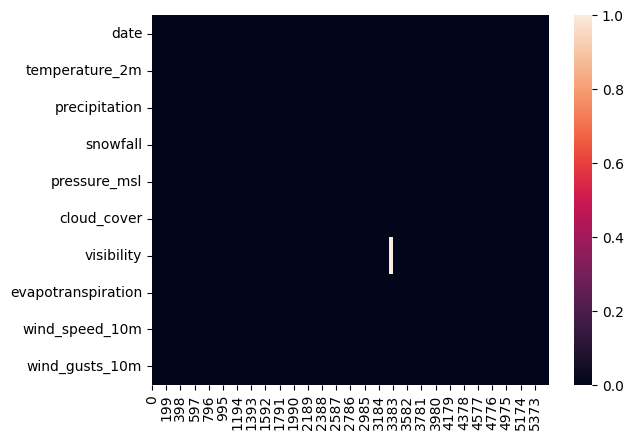

In [81]:
# visualización los valores nulos en todo el conjunto de datos
(
    hourly_dataframe
    .isnull()
    .transpose()
    .pipe(
        lambda df:(
            sns.heatmap(
                data = df
            )
        )
    )
)
plt.show()

In [82]:
# Cantidad de valores nulos por variable
print( 'Cantidad de valores duplicados:', (
    hourly_dataframe
    .isnull()
    .sum()
))

Cantidad de valores duplicados: date                   0
temperature_2m         0
precipitation          0
snowfall               0
pressure_msl           0
cloud_cover            0
visibility            60
evapotranspiration     0
wind_speed_10m         0
wind_gusts_10m         0
dtype: int64


In [83]:
hourly_dataframe

,date,temperature_2m,precipitation,snowfall,pressure_msl,cloud_cover,visibility,evapotranspiration,wind_speed_10m,wind_gusts_10m
0,2023-04-12 22:00:00,27.196501,0.0,0.0,1008.299988,31.0,NaN,0.0,14.471821,33.839996
1,2023-04-12 23:00:00,25.846500,0.0,0.0,1008.599976,25.0,NaN,0.0,9.114471,28.799999
2,2023-04-13 00:00:00,24.396500,0.0,0.0,1008.599976,36.0,NaN,0.0,6.952754,17.280001
3,2023-04-13 01:00:00,22.946501,0.0,0.0,1009.700012,14.0,NaN,0.0,5.692100,12.240000
4,2023-04-13 02:00:00,21.796499,0.0,0.0,1009.900024,0.0,NaN,0.0,5.351785,10.799999
...,...,...,...,...,...,...,...,...,...,...
5565,2023-11-30 19:00:00,10.657499,0.0,0.0,1019.099976,0.0,53700.0,0.0,13.722565,24.480000
5566,2023-11-30 20:00:00,10.757500,0.0,0.0,1019.099976,0.0,49900.0,0.0,16.862455,28.440001
5567,2023-11-30 21:00:00,9.907499,0.0,0.0,1019.299988,19.0,49800.0,0.0,13.896187,28.799999
5568,2023-11-30 22:00:00,8.407499,0.0,0.0,1019.500000,9.0,43400.0,0.0,9.957108,25.559999


Podemos ver que el dataset posee 5570 filas y 10 columnas. Los valores nulos solo se encuentran en la columna 'visibility' y representan menos el 1% de los datos.

Los datos corresponden al preríodo comprendido entre el 12-04-2023 y el 30-11-2023

----

In [84]:
hourly_dataframe.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5570 entries, 0 to 5569
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                5570 non-null   datetime64[ns]
 1   temperature_2m      5570 non-null   float32       
 2   precipitation       5570 non-null   float32       
 3   snowfall            5570 non-null   float32       
 4   pressure_msl        5570 non-null   float32       
 5   cloud_cover         5570 non-null   float32       
 6   visibility          5510 non-null   float32       
 7   evapotranspiration  5570 non-null   float32       
 8   wind_speed_10m      5570 non-null   float32       
 9   wind_gusts_10m      5570 non-null   float32       
dtypes: datetime64[ns](1), float32(9)
memory usage: 239.5 KB


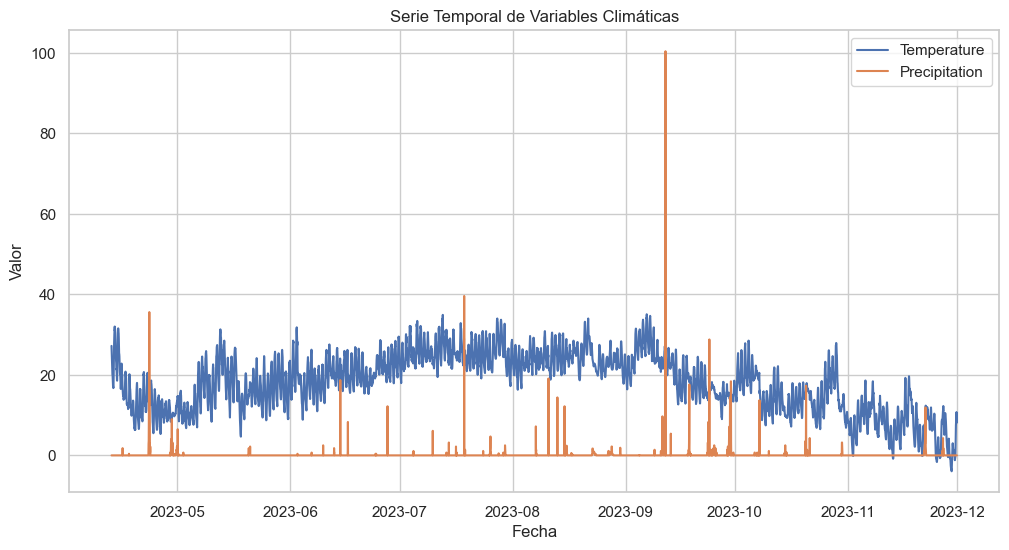

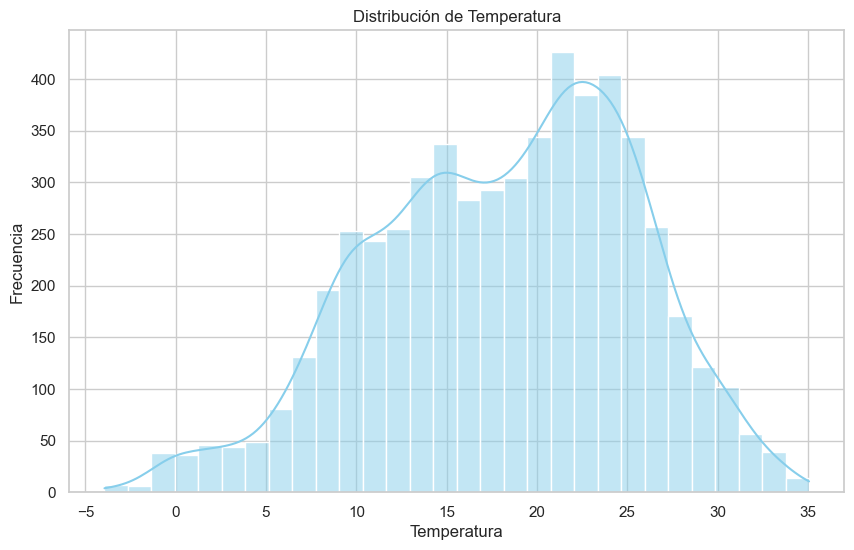

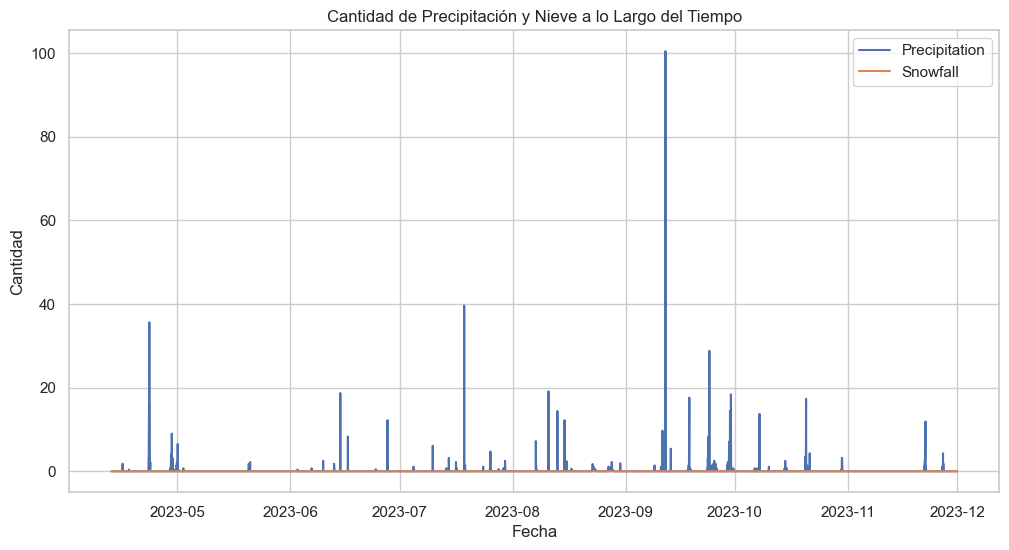

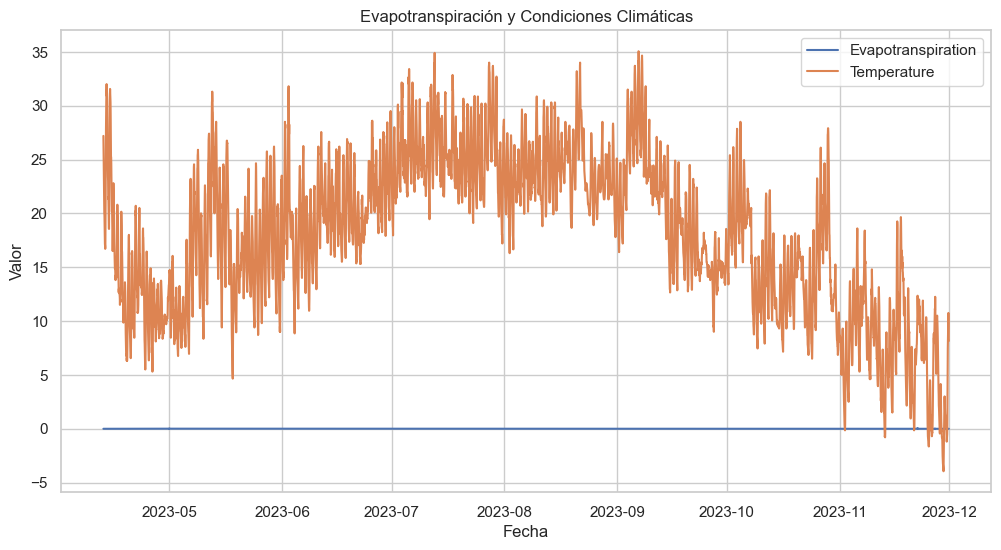

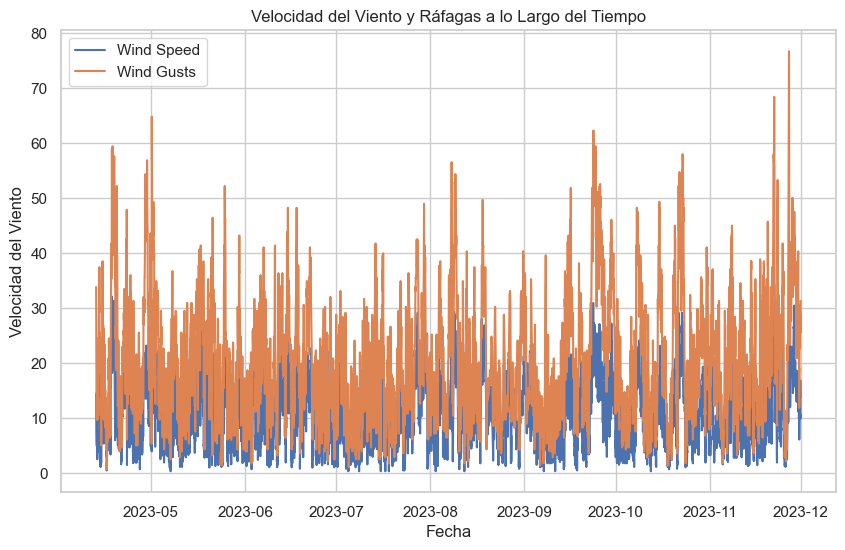

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el estilo de seaborn para gráficos más atractivos
sns.set(style="whitegrid")

df = hourly_dataframe

# Gráfica de Serie Temporal de Variables Climáticas
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='temperature_2m', data=df, label='Temperature')
sns.lineplot(x='date', y='precipitation', data=df, label='Precipitation')
plt.title('Serie Temporal de Variables Climáticas')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()
plt.show()

# Gráfica de Distribución de Temperatura
plt.figure(figsize=(10, 6))
sns.histplot(df['temperature_2m'], bins=30, kde=True, color='skyblue')
plt.title('Distribución de Temperatura')
plt.xlabel('Temperatura')
plt.ylabel('Frecuencia')
plt.show()

# Gráfico de Precipitación y Nieve
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='precipitation', data=df, label='Precipitation')
sns.lineplot(x='date', y='snowfall', data=df, label='Snowfall')
plt.title('Cantidad de Precipitación y Nieve a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Cantidad')
plt.legend()
plt.show()

# Gráfico de Correlación entre Velocidad del Viento y Viajes en Taxi
# plt.figure(figsize=(10, 6))
# sns.scatterplot(x='wind_speed_10m', y='taxi_trips', data=df)
# plt.title('Correlación entre Velocidad del Viento y Viajes en Taxi')
# plt.xlabel('Velocidad del Viento')
# plt.ylabel('Cantidad de Viajes en Taxi')
# plt.show()

# # Gráfico de Relación entre Variables Climáticas y Viajes de Taxis
# plt.figure(figsize=(12, 8))
# sns.heatmap(df[['temperature_2m', 'precipitation', 'taxi_trips']].corr(), annot=True, cmap='coolwarm')
# plt.title('Correlación entre Variables Climáticas y Viajes en Taxi')
# plt.show()

# # Gráfico de Visibilidad y Viajes en Taxi
# plt.figure(figsize=(10, 6))
# sns.scatterplot(x='visibility', y='taxi_trips', data=df)
# plt.title('Relación entre Visibilidad y Viajes en Taxi')
# plt.xlabel('Visibilidad')
# plt.ylabel('Cantidad de Viajes en Taxi')
# plt.show()

# Gráfico de Evapotranspiración y Condiciones Climáticas
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='evapotranspiration', data=df, label='Evapotranspiration')
sns.lineplot(x='date', y='temperature_2m', data=df, label='Temperature')
plt.title('Evapotranspiración y Condiciones Climáticas')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()
plt.show()

# Gráfico de Vientos Fuertes y Ráfagas
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='wind_speed_10m', data=df, label='Wind Speed')
sns.lineplot(x='date', y='wind_gusts_10m', data=df, label='Wind Gusts')
plt.title('Velocidad del Viento y Ráfagas a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Velocidad del Viento')
plt.legend()
plt.show()
